In [15]:
#regular libraries 
import pandas as pd
import numpy as np
import scipy
import sklearn
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [3]:
df = pd.read_csv('2020_PT_Region_Mobility_Report.csv')

In [5]:
df.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,PT,Portugal,NaN,NaN,NaN,NaN,NaN,ChIJ1SZCvy0kMgsRQfBOHAlLuCo,2020-02-15,4.0,0.0,21.0,9.0,1.0,-1.0
1,PT,Portugal,NaN,NaN,NaN,NaN,NaN,ChIJ1SZCvy0kMgsRQfBOHAlLuCo,2020-02-16,-3.0,2.0,-14.0,3.0,1.0,0.0
2,PT,Portugal,NaN,NaN,NaN,NaN,NaN,ChIJ1SZCvy0kMgsRQfBOHAlLuCo,2020-02-17,0.0,3.0,8.0,3.0,3.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68706 entries, 0 to 68705
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 68706 non-null  object 
 1   country_region                                      68706 non-null  object 
 2   sub_region_1                                        68326 non-null  object 
 3   sub_region_2                                        60756 non-null  object 
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     7570 non-null   object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            68706 non-null  object 
 8   date                                                68706 non-null  object 


In [19]:
#metric and non metric features 
feat_metric = df.select_dtypes(include = ['int64', float]).columns.to_list()
feat_non_metric = df.select_dtypes(exclude = ['int64', float]).columns.to_list()

In [22]:
#null values
df.isna().sum()

country_region_code                                       0
country_region                                            0
sub_region_1                                            380
sub_region_2                                           7950
metro_area                                            68706
iso_3166_2_code                                       61136
census_fips_code                                      68706
place_id                                                  0
date                                                      0
retail_and_recreation_percent_change_from_baseline    27038
grocery_and_pharmacy_percent_change_from_baseline     28520
parks_percent_change_from_baseline                    37844
transit_stations_percent_change_from_baseline         43691
workplaces_percent_change_from_baseline                2231
residential_percent_change_from_baseline              32763
dtype: int64

In [24]:
#duplicated
df.duplicated().sum()

0

In [25]:
#describe the variables 
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_region_code,68706,1,PT,68706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_region,68706,1,Portugal,68706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_region_1,68326,20,Porto District,7021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_region_2,60756,191,Santa Maria da Feira,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso_3166_2_code,7570,20,PT-08,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
census_fips_code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_id,68706,212,ChIJl-FuC5heGA0R8CyQ5L3rAAM,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,68706,380,2020-09-24,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_and_recreation_percent_change_from_baseline,41668.0,NaN,NaN,NaN,-31.373644,29.786946,-98.0,-58.0,-25.0,-10.0,139.0


ValueError: autodetected range of [nan, nan] is not finite

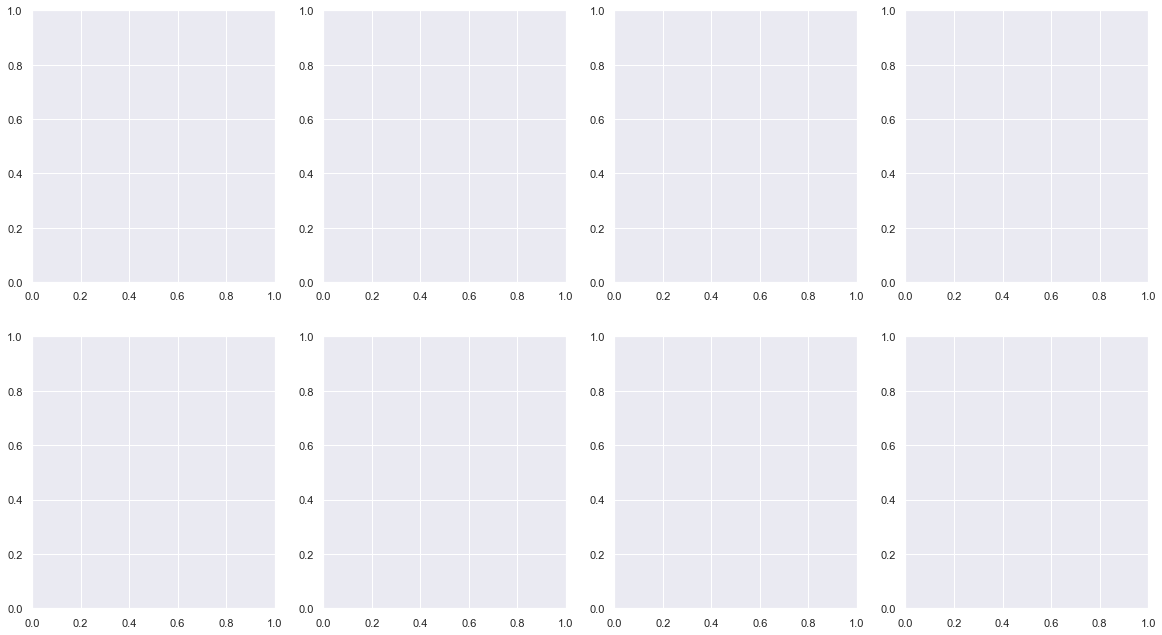

In [46]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(feat_metric) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), feat_metric): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [47]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='portugal_mobility.html')


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
## AIRBNB teste

In [28]:
listings = pd.read_csv(r'C:\Users\hirom\Documents\GitHub\Data_Visualization_Projects\AIRBNB_Teste\listings.csv')
reviews = pd.read_csv(r'C:\Users\hirom\Documents\GitHub\Data_Visualization_Projects\AIRBNB_Teste\reviews.csv')

In [38]:
listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.34,1,341
1,25659,Heart of Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,30,10,113,2019-12-08,1.36,1,108
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,38,3,325,2021-01-10,2.64,1,303


In [39]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19877 entries, 0 to 19876
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19877 non-null  int64  
 1   name                            19867 non-null  object 
 2   host_id                         19877 non-null  int64  
 3   host_name                       19871 non-null  object 
 4   neighbourhood_group             19877 non-null  object 
 5   neighbourhood                   19877 non-null  object 
 6   latitude                        19877 non-null  float64
 7   longitude                       19877 non-null  float64
 8   room_type                       19877 non-null  object 
 9   price                           19877 non-null  int64  
 10  minimum_nights                  19877 non-null  int64  
 11  number_of_reviews               19877 non-null  int64  
 12  last_review                     

In [34]:
listings.isna().sum()

id                                   0
name                                10
host_id                              0
host_name                            6
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3513
reviews_per_month                 3513
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [36]:
listings.duplicated().sum()

0

In [42]:
listings.iloc[:,8:].describe(include="all")

,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,19877,19877.000000,19877.000000,19877.000000,16364,16364.000000,19877.000000,19877.000000
unique,4,NaN,NaN,NaN,1345,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,NaN,2021-01-02,NaN,NaN,NaN
freq,14725,NaN,NaN,NaN,247,NaN,NaN,NaN
mean,NaN,95.248126,3.797505,42.871610,NaN,1.159754,13.231222,233.768677
std,NaN,260.058829,16.302138,67.660159,NaN,1.250472,35.477287,133.028502
min,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,NaN,40.000000,1.000000,2.000000,NaN,0.240000,1.000000,122.000000
50%,NaN,60.000000,2.000000,13.000000,NaN,0.720000,3.000000,278.000000
75%,NaN,94.000000,3.000000,55.000000,NaN,1.730000,10.000000,361.000000


In [48]:
from pandas_profiling import ProfileReport
prof = ProfileReport(listings)
prof.to_file(output_file='airbnb_listings.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
reviews.head(3)

,listing_id,date
0,6499,2014-09-02
1,6499,2014-10-11
2,6499,2015-01-02


In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852159 entries, 0 to 852158
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  852159 non-null  int64 
 1   date        852159 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


In [44]:
reviews.isna().sum()

listing_id    0
date          0
dtype: int64

In [49]:
prof_ar = ProfileReport(reviews)
prof_ar.to_file(output_file='airbnb_reviews.html')

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]